# **Experiments**

# Library

In [ ]:
# 0) 흔적 제거 (있으면)
!pip uninstall -y xformers diffusers transformers accelerate safetensors torch torchvision torchaudio

# 1) PyTorch 세트 먼저 설치 (CUDA 12.4 빌드로 통일)
!pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu124

# 2) 그 다음 기타 라이브러리 (torch 건드리지 않게 --no-deps 권장)
!pip install -U diffusers>=0.31.0 transformers>=4.44.0 accelerate safetensors --no-deps


Found existing installation: diffusers 0.34.0
Uninstalling diffusers-0.34.0:
  Successfully uninstalled diffusers-0.34.0
Found existing installation: transformers 4.55.2
Uninstalling transformers-4.55.2:
  Successfully uninstalled transformers-4.55.2
Found existing installation: accelerate 1.10.0
Uninstalling accelerate-1.10.0:
  Successfully uninstalled accelerate-1.10.0
Found existing installation: safetensors 0.6.2
Uninstalling safetensors-0.6.2:
  Successfully uninstalled safetensors-0.6.2
Found existing installation: torch 2.8.0+cu126
Uninstalling torch-2.8.0+cu126:
  Successfully uninstalled torch-2.8.0+cu126
Found existing installation: torchvision 0.23.0+cu126
Uninstalling torchvision-0.23.0+cu126:
  Successfully uninstalled torchvision-0.23.0+cu126
Found existing installation: torchaudio 2.8.0+cu126
Uninstalling torchaudio-2.8.0+cu126:
  Successfully uninstalled torchaudio-2.8.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch, torchvision, torchaudio, diffusers, transformers, accelerate
print("torch        :", torch.__version__)
print("torchvision  :", torchvision.__version__)
print("torchaudio   :", torchaudio.__version__)
print("diffusers    :", diffusers.__version__)
print("transformers :", transformers.__version__)
print("accelerate   :", accelerate.__version__)
print("CUDA avail?  :", torch.cuda.is_available())


torch        : 2.6.0+cu124
torchvision  : 0.21.0+cu124
torchaudio   : 2.6.0+cu124
diffusers    : 0.35.1
transformers : 4.55.3
accelerate   : 1.10.0
CUDA avail?  : True


# baseline(SD), child 비교

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

#LORA_PATH = "/content/drive/MyDrive/KUBIG/basic_cv_2/LoRA/vividWatercolors_10.safetensors"
LORA_PATH = "/content/drive/MyDrive/KUBIG/basic_cv_2/LoRA/doodle.safetensors"
OUTPUT_DIR = "/content/drive/MyDrive/KUBIG/basic_cv_2/outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

MODEL_ID = "runwayml/stable-diffusion-v1-5"  # HF에서 약관 동의 필요
pipe = StableDiffusionPipeline.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float16,
    use_safetensors=True,
)

# 샘플러 선택(선호): DPM-Solver 멀티스텝
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# 저VRAM 옵션
pipe.enable_vae_slicing()
# pipe.enable_sequential_cpu_offload()  # VRAM 아주 빡빡할 때만 활성화(속도 저하)
try:
    pipe.enable_xformers_memory_efficient_attention()  # xformers 미설치면 건너뜀
except Exception as e:
    print("xFormers not enabled (OK):", e)

pipe.to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

xFormers not enabled (OK): Refer to https://github.com/facebookresearch/xformers for more information on how to install xformers


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.35.1",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
# ---- [블록 3 교체용] 베이스라인 vs doodle(0.65) 비교 생성 ----
import os
from PIL import Image

OUTPUT_DIR = "./outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

prompt = "A colorful science fantasy illustration of a futuristic space colony and massive space station orbiting an alien planet, astronauts exploring the strange landscape, glowing alien plants and bioluminescent forests, playful and imaginative children's art style, vibrant watercolor textures, highly detailed yet whimsical, imaginative science fair artwork"
negative_prompt = "blurry, text"

seed = 777
common = dict(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=35,
    guidance_scale=6.0,
    width=768, height=512,
)

def new_gen(s):  # 동일 시드 재현
    return torch.Generator(device="cuda").manual_seed(s)

# (1) 베이스라인: LoRA 완전 해제 후 생성
try:
    pipe.unload_lora_weights()  # 로드된 LoRA가 있으면 제거
except Exception:
    pass

img_base = pipe(**common, generator=new_gen(seed)).images[0]
base_path = os.path.join(OUTPUT_DIR, f"sd15_baseline_seed{seed}.png")
img_base.save(base_path)
print("Saved baseline:", base_path)

# (2) doodle LoRA x0.65 적용 후 생성
LORA_SCALE = 0.4

try:
    pipe.load_lora_weights(LORA_PATH, adapter_name="doodle")
except Exception as e:
    repo_dir = os.path.dirname(LORA_PATH)
    weight_name = os.path.basename(LORA_PATH)
    pipe.load_lora_weights(repo_dir, weight_name=weight_name, adapter_name="doodle")

# 텍스트 인코더까지 포함한 LoRA 강도 통일 적용
pipe.set_adapters(["doodle"], adapter_weights=[LORA_SCALE])

# ⚠️ 여기서는 cross_attention_kwargs={"scale": ...} 넣지 마세요 (UNet만 이중 스케일됨)
img_lora = pipe(**common, generator=new_gen(seed)).images[0]
lora_path = os.path.join(OUTPUT_DIR, f"sd15_doodle065_seed{seed}.png")
img_lora.save(lora_path)
print("Saved LoRA x0.65:", lora_path)

# (선택) 좌우 비교 이미지 저장
side = Image.new("RGB", (img_base.width * 2, img_base.height))
side.paste(img_base, (0, 0))
side.paste(img_lora, (img_base.width, 0))
side_path = os.path.join(OUTPUT_DIR, f"compare_baseline_vs_doodle065_seed{seed}.png")
side.save(side_path)
print("Saved compare:", side_path)


  0%|          | 0/35 [00:00<?, ?it/s]

Saved baseline: ./outputs/sd15_baseline_seed777.png


  0%|          | 0/35 [00:00<?, ?it/s]

Saved LoRA x0.65: ./outputs/sd15_doodle065_seed777.png
Saved compare: ./outputs/compare_baseline_vs_doodle065_seed777.png


# child+water color multi-LoRA

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

BASE_DIR   = "/content/drive/MyDrive/KUBIG/basic_cv_2"
LORA_DIR   = f"{BASE_DIR}/LoRA"
OUTPUT_DIR = f"{BASE_DIR}/outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

LORA1_PATH = f"{LORA_DIR}/doodle.safetensors"             # 아이 그림체
LORA2_PATH = f"{LORA_DIR}/vividWatercolors_10.safetensors" # 수채화풍 (파일명에 맞게 수정 가능)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

MODEL_ID = "runwayml/stable-diffusion-v1-5"  # HF 약관 동의 필요

# safety_checker 비활성(가끔 오탐으로 검은 화면 방지)
pipe = StableDiffusionPipeline.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float16,
    use_safetensors=True,
    safety_checker=None,
)
def _dummy_safety(images, **kwargs):
    return images, [False] * len(images)
pipe.safety_checker = _dummy_safety

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_vae_slicing()
pipe.to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
# 각 LoRA에 adapter_name을 지정해서 로드
pipe.load_lora_weights(LORA1_PATH, adapter_name="child")       # 아이 그림체
pipe.load_lora_weights(LORA2_PATH, adapter_name="watercolor")  # 수채화풍

print("Loaded adapters:", pipe.get_active_adapters())


/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


Loaded adapters: ['watercolor']


  0%|          | 0/35 [00:00<?, ?it/s]

Saved to: /content/drive/MyDrive/KUBIG/basic_cv_2/outputs/mix_child_watercolor_seed_777.png


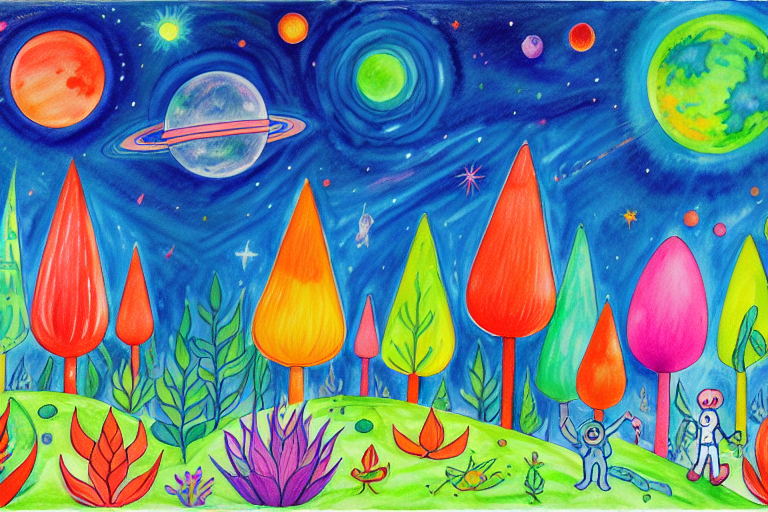

In [ ]:
import torch, os

# 동시에 활성화 + 가중치 비율
pipe.set_adapters(["child", "watercolor"], adapter_weights=[0.65, 0.55])

prompt = (
    "A colorful science fantasy illustration of a futuristic space colony and massive space station orbiting an alien planet, astronauts exploring the strange landscape, glowing alien plants and bioluminescent forests, playful and imaginative children's art style, vibrant watercolor textures, highly detailed yet whimsical, imaginative science fair artwork"
)
negative_prompt = "blurry, text"

seed = 777
g = torch.Generator(device="cuda").manual_seed(seed)

image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=35,
    guidance_scale=6,
    width=768, height=512,
    generator=g,
).images[0]

save_path = os.path.join(OUTPUT_DIR, f"mix_child_watercolor_seed_{seed}.png")
image.save(save_path)
print("Saved to:", save_path)
image


# child+watercolor+science multi-LoRA

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
dtype = torch.float16 if device == "cuda" else torch.float32

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=dtype,
    safety_checker=None,
)

if device == "cuda":
    pipe.enable_attention_slicing()  # VRAM 절약
    try:
        pipe.enable_xformers_memory_efficient_attention()
    except Exception:
        pass

pipe = pipe.to(device)

In [ ]:
pipe.load_lora_weights(".", weight_name="doodle.safetensors", adapter_name="styleA")
pipe.load_lora_weights(".", weight_name="vividWatercolors_10.safetensors", adapter_name="styleB")
pipe.load_lora_weights(".", weight_name="V1.1-17SciencefictioncityonMars.safetensors", adapter_name="styleC")
pipe.set_adapters(["styleA", "styleB", "styleC"], adapter_weights=[0.65, 0.55, 0])


In [ ]:
# ----- 프롬프트 세팅 -----
prompt ="A colorful science fantasy illustration of a futuristic space colony and massive space station orbiting an alien planet, astronauts exploring the strange landscape, glowing alien plants and bioluminescent forests, playful and imaginative children's art style, vibrant watercolor textures, highly detailed yet whimsical, imaginative science fair artwork"
negative_prompt = "blurry, text"

# 튜닝 대상 목록
cfg_list   = [6]          # 창의성↔프롬프트 충실성
steps_list = [35]              # 스텝
base_seed  = 777                        # 동일 시드로 '변수 영향'만 비교
W, H = 768, 512

In [ ]:
def render(cfg, steps, seed):
    g = torch.Generator(device=device).manual_seed(seed)
    result = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        guidance_scale=cfg,
        num_inference_steps=steps,
        width=W, height=H,
        generator=g
    )
    return result.images[0]

# 개별 저장
os.makedirs("outs_folder", exist_ok=True)
generated = []  # (cfg, steps, seed, image)

for i, (cfg, steps) in enumerate(itertools.product(cfg_list, steps_list)):
    seed = base_seed  # ← 모든 조합 동일 시드(효과 비교에 좋음)
    img = render(cfg, steps, seed)
    fname = f"outs_folder/sd15_cfg{str(cfg).replace('.','p')}_st{steps}_seed{seed}.png"
    img.save(fname)
    generated.append((cfg, steps, seed, img))



# DARE (비선형 LoRA) Experiment

In [ ]:
# 설치
!pip -q install safetensors

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

LORA_DIR = "/content/drive/MyDrive/KUBIG/basic_cv_2/LoRA"
FILES = [
    "V1.1-17SciencefictioncityonMars.safetensors",
    "doodle.safetensors",
    "vividWatercolors_10.safetensors",
]

# 존재 확인
for fn in FILES:
    p = os.path.join(LORA_DIR, fn)
    print(f"[check] {p}  ->  {'OK' if os.path.exists(p) else 'MISSING'}")


[check] /content/drive/MyDrive/KUBIG/basic_cv_2/LoRA/V1.1-17SciencefictioncityonMars.safetensors  ->  OK
[check] /content/drive/MyDrive/KUBIG/basic_cv_2/LoRA/doodle.safetensors  ->  OK
[check] /content/drive/MyDrive/KUBIG/basic_cv_2/LoRA/vividWatercolors_10.safetensors  ->  OK


In [ ]:
from safetensors.torch import safe_open

def infer_rank_from_key_and_shape(key: str, shape: tuple):
    """key/shape로부터 r(랭크) 추정. 못 찾으면 None"""
    k = key.lower()
    if ("lora_a" in k) or ("lora_down" in k):
        # (r, in) or (r, in, 1, 1)
        return shape[0]
    if ("lora_b" in k) or ("lora_up" in k):
        # (out, r) or (out, r, 1, 1)
        # 2D/4D 모두 두 번째 차원이 r
        return shape[1] if len(shape) >= 2 else None
    return None

def read_lora_rank_report(path: str):
    ranks = []
    per_key = []
    meta = {}
    with safe_open(path, framework="pt") as f:
        try:
            meta = f.metadata() or {}
        except Exception:
            meta = {}
        keys = list(f.keys())

        # 우선 down/A 키 → 없으면 up/B 키
        candidate_keys = [k for k in keys if ("lora_A" in k or "lora_down" in k)]
        if not candidate_keys:
            candidate_keys = [k for k in keys if ("lora_B" in k or "lora_up" in k)]
        if not candidate_keys:
            raise ValueError("LoRA 텐서(lora_A/B 또는 lora_down/up) 키를 찾지 못했습니다.")

        # 여러 레이어의 r을 수집하여 일관성 체크
        for k in candidate_keys:
            t = f.get_tensor(k)
            r = infer_rank_from_key_and_shape(k, tuple(t.shape))
            if r is not None:
                ranks.append(int(r))
                per_key.append((k, tuple(t.shape), int(r)))

    report = {
        "path": path,
        "metadata": meta,
        "sample_count": len(ranks),
        "ranks_found": ranks,
        "unique_ranks": sorted(set(ranks)),
        "per_key": per_key,
        "meta_rank_candidates": {
            # 훈련툴에 따라 다름: 하나라도 있으면 참고용으로 출력
            "lora_dim": meta.get("lora_dim"),
            "network_dim": meta.get("network_dim"),
            "rank": meta.get("rank"),
            "r": meta.get("r"),
        }
    }
    return report

def pretty_print_report(rep):
    print(f"\n=== {os.path.basename(rep['path'])} ===")
    print(f"- keys scanned          : {rep['sample_count']} (r 추정에 사용된 텐서 수)")
    print(f"- unique r from shapes  : {rep['unique_ranks']}")
    meta = rep["meta_rank_candidates"]
    if any(v is not None for v in meta.values()):
        print(f"- metadata (if any)     : {meta}")
    else:
        print(f"- metadata (if any)     : <none>")
    # 레이어별 r이 섞여 있는지 점검
    if len(rep["unique_ranks"]) == 1:
        print(f"-> ✅ 레이어 전반에서 r가 일관됨 (r={rep['unique_ranks'][0]})")
    else:
        print(f"-> ⚠️ 일부 레이어에서 r가 섞여 있음: {rep['unique_ranks']}")
        # 필요시 몇 개 키만 샘플 출력
        for k, shape, r in rep["per_key"][:5]:
            print(f"   · {k}  shape={shape}  -> r={r}")


In [ ]:
reports = []
for fn in FILES:
    path = os.path.join(LORA_DIR, fn)
    rep = read_lora_rank_report(path)
    reports.append(rep)
    pretty_print_report(rep)

# 파일들 간 r 일치 여부
all_unique_sets = [tuple(r["unique_ranks"]) for r in reports]
# 일반적으로 unique_ranks는 [r] 꼴(단일값)이어야 함
all_single = all(len(u)==1 for u in all_unique_sets)
if all_single:
    r_values = [u[0] for u in all_unique_sets]
    same_across_files = (len(set(r_values)) == 1)
    print("\n=== 요약 ===")
    print(f"- 각 파일 내부 r 일관성 : {'모두 일관' if all_single else '일부 불일치'}")
    print(f"- 파일 간 r 동일성     : {'✅ 동일' if same_across_files else '⚠️ 서로 다름'}")
    print(f"- r 목록                : {dict(zip([os.path.basename(r['path']) for r in reports], r_values))}")
else:
    print("\n=== 요약 ===")
    print("- 적어도 한 LoRA 파일 내부에서 레이어별 r가 섞여 있습니다. 병합 전 개별 레이어 호환성부터 확인 필요.")



=== V1.1-17SciencefictioncityonMars.safetensors ===
- keys scanned          : 264 (r 추정에 사용된 텐서 수)
- unique r from shapes  : [32]
- metadata (if any)     : <none>
-> ✅ 레이어 전반에서 r가 일관됨 (r=32)

=== doodle.safetensors ===
- keys scanned          : 264 (r 추정에 사용된 텐서 수)
- unique r from shapes  : [128]
- metadata (if any)     : <none>
-> ✅ 레이어 전반에서 r가 일관됨 (r=128)

=== vividWatercolors_10.safetensors ===
- keys scanned          : 264 (r 추정에 사용된 텐서 수)
- unique r from shapes  : [128]
- metadata (if any)     : <none>
-> ✅ 레이어 전반에서 r가 일관됨 (r=128)

=== 요약 ===
- 각 파일 내부 r 일관성 : 모두 일관
- 파일 간 r 동일성     : ⚠️ 서로 다름
- r 목록                : {'V1.1-17SciencefictioncityonMars.safetensors': 32, 'doodle.safetensors': 128, 'vividWatercolors_10.safetensors': 128}


# **Analysis**

# 각 LoRA 영향 분석

In [ ]:
# 설치
!pip -q install -U diffusers transformers peft accelerate safetensors scikit-learn matplotlib

# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 경로/파일 설정
import os, glob

BASE_DIR = "/content/drive/MyDrive/KUBIG/basic_cv_2"
LORA_DIR = f"{BASE_DIR}/LoRA"
MODEL_ID = "runwayml/stable-diffusion-v1-5"

# 사용 파일명 (폴더에 실제로 있는지 바로 확인)
LORA_FILES = {
    "science": "V1.1-17SciencefictioncityonMars.safetensors",
    "doodle":  "doodle.safetensors",
    "water":   "vividWatercolors_10.safetensors",
}

print("[dir exists?]", LORA_DIR, os.path.isdir(LORA_DIR))
print("[files in LoRA dir]:", os.listdir(LORA_DIR))

# 존재 확인
missing = []
for k,v in LORA_FILES.items():
    p = os.path.join(LORA_DIR, v)
    ok = os.path.exists(p)
    print(f"[check] {k}: {p} -> {'OK' if ok else 'MISSING'}")
    if not ok: missing.append(p)

assert os.path.isdir(LORA_DIR), "LoRA 디렉토리가 없습니다. 경로를 다시 확인하세요."
assert not missing, f"아래 파일을 찾지 못했습니다. 파일명/확장자를 정확히 확인하세요:\n" + "\n".join(missing)

# 공통 생성 설정
prompt = "futuristic science illustration of a spaceship and alien on Mars, watercolor children's drawing, wide shot"
negative_prompt = ""
num_steps = 30
guidance = 7.5
height, width = 512, 512
seed = 1234

# 출력 폴더
OUT_DIR = f"{BASE_DIR}/lora_influence_outputs"
os.makedirs(OUT_DIR, exist_ok=True)
print("[OUT_DIR]", OUT_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[dir exists?] /content/drive/MyDrive/KUBIG/basic_cv_2/LoRA True
[files in LoRA dir]: ['vividWatercolors_10.safetensors', 'doodle.safetensors', 'V1.1-17SciencefictioncityonMars.safetensors']
[check] science: /content/drive/MyDrive/KUBIG/basic_cv_2/LoRA/V1.1-17SciencefictioncityonMars.safetensors -> OK
[check] doodle: /content/drive/MyDrive/KUBIG/basic_cv_2/LoRA/doodle.safetensors -> OK
[check] water: /content/drive/MyDrive/KUBIG/basic_cv_2/LoRA/vividWatercolors_10.safetensors -> OK
[OUT_DIR] /content/drive/MyDrive/KUBIG/basic_cv_2/lora_influence_outputs


In [ ]:
import numpy as np
import torch, torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from safetensors.torch import safe_open

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

pipe = StableDiffusionPipeline.from_pretrained(
    MODEL_ID, torch_dtype=torch.float16, safety_checker=None
).to(device)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# LoRA 로드(어댑터명 부여)
for name, fn in LORA_FILES.items():
    path = os.path.join(LORA_DIR, fn)
    pipe.load_lora_weights(path, adapter_name=name)
print("Loaded adapters:", list(LORA_FILES.keys()))

@torch.no_grad()
def get_text_embeds(pipe, prompt, negative_prompt, guidance):
    """
    diffusers 버전마다 encode_prompt 반환형(텐서/튜플)이 달라서 호환 처리
    """
    try:
        out = pipe.encode_prompt(
            prompt=prompt,
            device=pipe.device,
            num_images_per_prompt=1,
            do_classifier_free_guidance=(guidance > 1.0),
            negative_prompt=negative_prompt,
        )
        if isinstance(out, tuple) and len(out) >= 2:
            prompt_embeds, negative_prompt_embeds = out[0], out[1]
            text_embeds = torch.cat([negative_prompt_embeds, prompt_embeds], dim=0) if guidance > 1.0 else prompt_embeds
        else:
            text_embeds = out  # 구버전: 이미 concat된 텐서
    except Exception:
        # 더 구버전 fallback
        text_embeds = pipe._encode_prompt(
            prompt,
            device=pipe.device,
            num_images_per_prompt=1,
            do_classifier_free_guidance=(guidance > 1.0),
            negative_prompt=negative_prompt,
        )
    return text_embeds


def _current_adapter_names(pipe):
    """
    지금 파이프라인에 로드된 어댑터 이름 집합(가능한 곳에서만 안전하게 읽음)
    """
    names = set()
    # UNet
    try:
        names.update(getattr(pipe.unet, "peft_config", {}).keys())
    except Exception:
        pass
    # text encoders / transformer 등 (있을 수도, 없을 수도)
    for te in ["text_encoder", "text_encoder_2", "transformer"]:
        m = getattr(pipe, te, None)
        try:
            if m is not None:
                names.update(getattr(m, "peft_config", {}).keys())
        except Exception:
            pass
    return list(names)


@torch.no_grad()
def run_and_collect_latents(pipe, active_adapters=None, adapter_weights=None, seed=0):
    """
    - baseline: 파이프라인 레벨에서 LoRA 전부 언로드(unload_lora_weights)
                (안 되면 현재 로드된 어댑터 이름들에 weight=0으로 우회)
    - LoRA 케이스: 필요한 어댑터가 로드되어 있는지 확인 후 set_adapters([...], weights)
    """
    # === 어댑터 설정 ===
    if not active_adapters:  # baseline
        label = "baseline"
        try:
            pipe.unload_lora_weights()  # 가장 깔끔
        except Exception:
            # 우회: 현재 로드된 어댑터 이름들만 0으로
            names = _current_adapter_names(pipe)
            if names:
                pipe.set_adapters(names, adapter_weights=[0.0] * len(names))
    else:
        label = "+".join(active_adapters)
        # 필요한 어댑터가 로드되어 있는지 확인(없으면 로드)
        for name in active_adapters:
            if name not in getattr(pipe.unet, "peft_config", {}):
                # 너가 이미 상단에서 load_lora_weights 했으므로 보통 건너뜀
                # 그래도 혹시 빠졌으면 파일에서 다시 로드
                path = os.path.join(LORA_DIR, LORA_FILES[name])
                pipe.load_lora_weights(path, adapter_name=name)
        # 활성화
        if adapter_weights is None:
            adapter_weights = [1.0] * len(active_adapters)
        pipe.set_adapters(active_adapters, adapter_weights=adapter_weights)

    # === 텍스트 임베딩 ===
    text_embeds = get_text_embeds(pipe, prompt, negative_prompt, guidance)

    # === 디퓨전 루프 ===
    pipe.scheduler.set_timesteps(num_steps, device=pipe.device)
    timesteps = pipe.scheduler.timesteps
    g = torch.Generator(device=pipe.device).manual_seed(seed)
    latents = pipe.prepare_latents(
        1, pipe.unet.config.in_channels, height, width,
        dtype=text_embeds.dtype, device=pipe.device, generator=g
    )

    z_hist = []
    for t in timesteps:
        latent_model_input = torch.cat([latents] * 2) if guidance > 1.0 else latents
        latent_model_input = pipe.scheduler.scale_model_input(latent_model_input, t)

        noise_pred = pipe.unet(latent_model_input, t, encoder_hidden_states=text_embeds).sample
        if guidance > 1.0:
            noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
            noise_pred = noise_pred_uncond + guidance * (noise_pred_text - noise_pred_uncond)

        latents = pipe.scheduler.step(noise_pred, t, latents).prev_sample
        z_hist.append(latents.detach().float().cpu().numpy())

    # === 디코딩 ===
    image = pipe.vae.decode(latents / pipe.vae.config.scaling_factor, return_dict=False)[0]
    image = (image / 2 + 0.5).clamp(0, 1)
    image = (image[0].detach().cpu().permute(1, 2, 0).numpy() * 255).astype(np.uint8)
    pil = Image.fromarray(image)
    return z_hist, pil, label



def save_image(img: Image.Image, path: str):
    img.save(path); print("[saved]", path)

def show_and_save_lineplot(x, ys, labels, title, path):
    plt.figure(figsize=(7,4))
    for y, lab in zip(ys, labels):
        plt.plot(x, y, label=lab)
    plt.xlabel("timestep"); plt.ylabel("||Δz||_2 vs baseline")
    plt.title(title); plt.legend(); plt.tight_layout()
    plt.savefig(path, dpi=160); plt.show(); print("[saved]", path)

def save_diff_heatmap(imgA: Image.Image, imgB: Image.Image, title, path):
    a = np.asarray(imgA).astype(np.float32)/255.0
    b = np.asarray(imgB).astype(np.float32)/255.0
    d = np.abs(a-b).mean(axis=2)
    d = d/(d.max()+1e-6)
    plt.figure(figsize=(6,5)); plt.imshow(d, cmap="gray", vmin=0, vmax=1)
    plt.title(title); plt.axis("off"); plt.tight_layout()
    plt.savefig(path, dpi=160); plt.show(); print("[saved]", path)


Device: cuda


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loaded adapters: ['science', 'doodle', 'water']


[saved] /content/drive/MyDrive/KUBIG/basic_cv_2/lora_influence_outputs/baseline.png
[saved] /content/drive/MyDrive/KUBIG/basic_cv_2/lora_influence_outputs/science.png
[saved] /content/drive/MyDrive/KUBIG/basic_cv_2/lora_influence_outputs/doodle.png
[saved] /content/drive/MyDrive/KUBIG/basic_cv_2/lora_influence_outputs/water.png


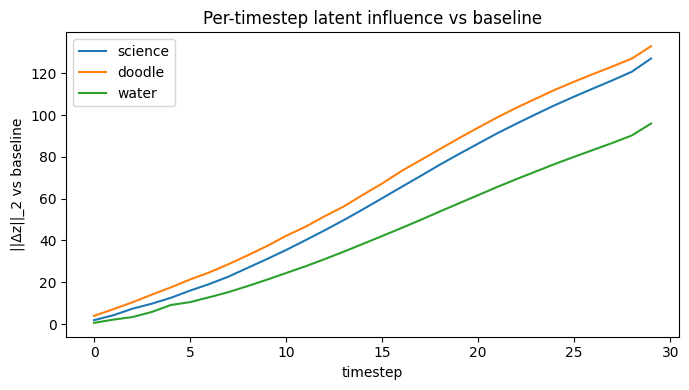

[saved] /content/drive/MyDrive/KUBIG/basic_cv_2/lora_influence_outputs/latent_influence.png


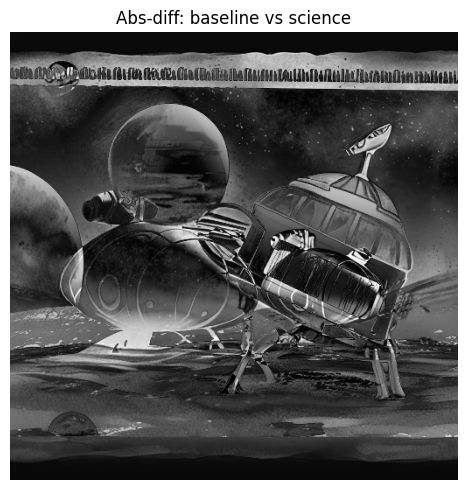

[saved] /content/drive/MyDrive/KUBIG/basic_cv_2/lora_influence_outputs/diff_science.png


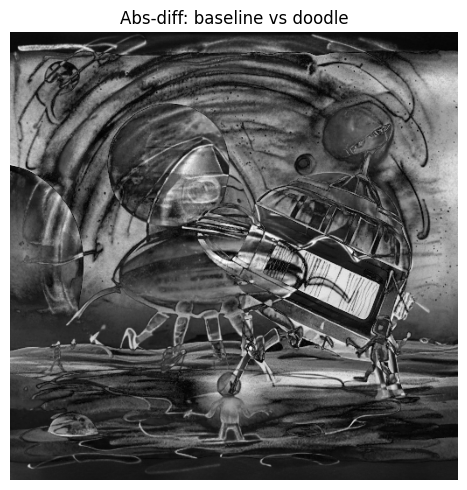

[saved] /content/drive/MyDrive/KUBIG/basic_cv_2/lora_influence_outputs/diff_doodle.png


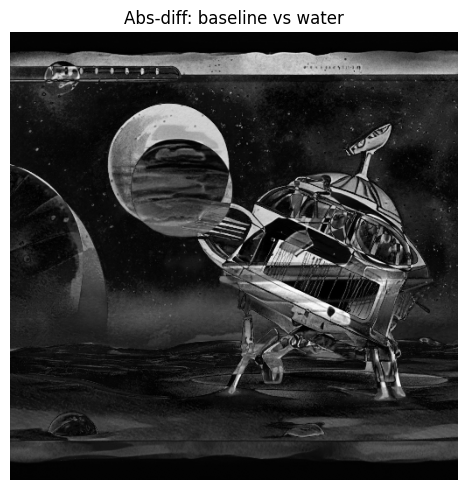

[saved] /content/drive/MyDrive/KUBIG/basic_cv_2/lora_influence_outputs/diff_water.png


In [ ]:
# 1) 베이스라인
z_base_hist, img_base, _ = run_and_collect_latents(pipe, active_adapters=[], seed=seed)
save_image(img_base, os.path.join(OUT_DIR, "baseline.png"))


# 2) 각 LoRA
results = {}
for name in LORA_FILES.keys():
    z_hist, img, label = run_and_collect_latents(pipe, active_adapters=[name], seed=seed)
    results[name] = {"z_hist": z_hist, "img": img, "label": label}
    save_image(img, os.path.join(OUT_DIR, f"{name}.png"))

# 3) 타임스텝별 영향 곡선
xs, ys, labs = list(range(len(z_base_hist))), [], []
for name, pack in results.items():
    diffs = [float(np.linalg.norm(pack["z_hist"][k] - z_base_hist[k])) for k in range(len(xs))]
    ys.append(diffs); labs.append(name)
show_and_save_lineplot(xs, ys, labs, "Per-timestep latent influence vs baseline",
                       os.path.join(OUT_DIR, "latent_influence.png"))

# 4) 이미지 차이 히트맵
for name, pack in results.items():
    save_diff_heatmap(img_base, pack["img"], f"Abs-diff: baseline vs {name}",
                      os.path.join(OUT_DIR, f"diff_{name}.png"))


# LoRA 유사도&직교성 분석

In [ ]:
# ===== Colab: LoRA 3개 유사도/직교성 분석 =====
# 준비물: .safetensors 형식의 LoRA 가중치 3개 (diffusers 포맷: ...lora_up/down.weight 키 포함)
# 사용법:
# 1) 아래 CONFIG에서 파일 경로를 지정하거나, 업로드 셀을 실행해 업로드하세요.
# 2) 실행하면 지표를 출력하고 CSV 파일을 /content 에 생성합니다.

!pip -q install safetensors pandas

import os, math, statistics as stats
from typing import Dict, List, Tuple
import torch
import pandas as pd
from safetensors.torch import load_file

# =====================[ CONFIG ]=====================
# (A) 직접 경로 지정 (예: 구글 드라이브 마운트 후 경로 넣기)
LORA_PATHS = [
    # "/content/drive/MyDrive/lora/A.safetensors",
    # "/content/drive/MyDrive/lora/B.safetensors",
    # "/content/drive/MyDrive/lora/C.safetensors",
]

LORA_NAMES = ["A", "B", "C"]  # 보고서 표기에 사용

# (B) 파일 업로드를 이용하려면 아래 주석 해제:
USE_UPLOAD = True
# ====================================================

# -------- (선택) 업로드로 파일 고르기 --------
if USE_UPLOAD and not LORA_PATHS:
    from google.colab import files
    print("LoRA .safetensors 3개를 업로드하세요 (A, B, C 순서 권장).")
    uploaded = files.upload()  # dialog
    LORA_PATHS = list(uploaded.keys())
    if len(LORA_PATHS) != 3:
        raise ValueError(f"3개 파일이 필요합니다. 현재 {len(LORA_PATHS)}개 업로드됨: {LORA_PATHS}")

# -------- 안전 체크 --------
assert len(LORA_PATHS) == 3, "LoRA 경로는 정확히 3개여야 합니다."
if len(LORA_NAMES) != 3:
    LORA_NAMES = [f"L{i+1}" for i in range(3)]

# =====================[ Helpers ]====================
def frobenius_norm(t: torch.Tensor) -> torch.Tensor:
    return torch.linalg.norm(t, ord="fro")

def normalize_frob(t: torch.Tensor) -> torch.Tensor:
    n = frobenius_norm(t)
    return t / (n + 1e-12)

def flatten(t: torch.Tensor) -> torch.Tensor:
    return t.reshape(-1)

def cosine_sim(a: torch.Tensor, b: torch.Tensor) -> float:
    a = a / (a.norm() + 1e-12)
    b = b / (b.norm() + 1e-12)
    return float((a * b).sum().item())

def principal_angles(Q1: torch.Tensor, Q2: torch.Tensor) -> torch.Tensor:
    """
    두 서브스페이스(열직교 기저 Q1, Q2)의 주각 (radian).
    cosines = svdvals(Q1^T Q2) ∈ [0,1]; angles = arccos(cosines)
    """
    if Q1.numel() == 0 or Q2.numel() == 0:
        return torch.tensor([])
    M = Q1.transpose(0, 1) @ Q2
    s = torch.linalg.svdvals(M).clamp(0, 1)
    return torch.arccos(s)

def load_lora_up_down(path: str):
    """
    safetensors에서 up/down 가중치(저순위 업데이트) 로드.
    반환:
      up_map[name]   = up (out_dim, r)
      down_map[name] = down (r, in_dim)
    """
    sd = load_file(path, device="cpu")
    ups = {k: v.float() for k, v in sd.items() if k.endswith("lora_up.weight")}
    downs = {k: v.float() for k, v in sd.items() if k.endswith("lora_down.weight")}
    def stem(k: str) -> str:
        return k.replace(".lora_up.weight", "").replace(".lora_down.weight", "")
    up_map = {stem(k): v for k, v in ups.items()}
    down_map = {stem(k): v for k, v in downs.items()}
    return up_map, down_map

def _as_2d_up(t: torch.Tensor, is_up: bool) -> torch.Tensor:
    """
    LoRA up/down weight를 2D로 펴기.
    - up 예상: (out_dim, r) 또는 (r, out_dim) 또는 Conv: (out_dim, r, kh, kw) / (r, out_dim, kh, kw)
    - down 예상: (r, in_dim) 또는 (in_dim, r) 또는 Conv: (r, in_dim, kh, kw) / (in_dim, r, kh, kw)
    """
    if t.dim() == 2:
        return t
    elif t.dim() == 4:
        # (A, B, kh, kw) -> (A, B*kh*kw)
        a, b, kh, kw = t.shape
        return t.reshape(a, b * kh * kw)
    else:
        # 드문 포맷: 3D 등은 마지막 두 축만 펼침
        a, b = t.shape[-2], t.shape[-1]
        return t.reshape(-1, b) if is_up else t.reshape(a, -1)

def _safe_delta(up: torch.Tensor, down: torch.Tensor) -> torch.Tensor:
    """
    up, down을 2D로 변환한 뒤 가능한 조합을 순서대로 시도하여
    ΔW (shape: out_dim, in_dim)를 만들어 반환.
    """
    U = _as_2d_up(up.float(), is_up=True)
    D = _as_2d_up(down.float(), is_up=False)

    # 가능한 4가지 매칭을 시도
    # 1) U(m,k) @ D(k,n)
    if U.size(1) == D.size(0):
        return U @ D
    # 2) U(m,k) @ D^T(k,n)  (D: n,k)
    if U.size(1) == D.size(1):
        return U @ D.t()
    # 3) U^T(m,k) @ D(k,n)  (U: k,m)
    if U.size(0) == D.size(0):
        return U.t() @ D
    # 4) U^T(m,k) @ D^T(k,n) (U: k,m, D: n,k)
    if U.size(0) == D.size(1):
        return U.t() @ D.t()

    raise RuntimeError(
        f"Cannot align up{tuple(U.shape)} and down{tuple(D.shape)} for matmul. "
        "Unsupported LoRA tensor shapes."
    )

def build_deltas(up_map: Dict[str, torch.Tensor], down_map: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
    """
    ΔW = up ⨉ down  (자동 전치/펼침으로 정렬하여 out_dim × in_dim 형태로 생성)
    """
    names = set(up_map.keys()).intersection(down_map.keys())
    deltas = {}
    for s in names:
        up = up_map[s]
        down = down_map[s]
        dW = _safe_delta(up, down)  # (out_dim, in_dim)로 만들어짐
        deltas[s] = dW
    return deltas


def concat_flattened(deltas: Dict[str, torch.Tensor]) -> torch.Tensor:
    # 레이어별 ΔW 정규화 후 벡터화 → 이어 붙임 (레이어 스케일 차이 완화)
    vecs = []
    for name in sorted(deltas.keys()):
        vecs.append(flatten(normalize_frob(deltas[name])))
    return torch.cat(vecs, dim=0) if vecs else torch.zeros(1)

def layerwise_cosine(d1: Dict[str, torch.Tensor], d2: Dict[str, torch.Tensor]) -> Dict[str, float]:
    sims = {}
    for name in sorted(set(d1.keys()).intersection(d2.keys())):
        a = flatten(normalize_frob(d1[name]))
        b = flatten(normalize_frob(d2[name]))
        sims[name] = cosine_sim(a, b)
    return sims

def svd_subspace_Q(A: torch.Tensor, max_r: int = 64, eps: float = 1e-6) -> torch.Tensor:
    """
    얇은 SVD로 좌특이벡터(U)의 유효랭크만 취한 직교 기저 생성.
    큰 텐서면 비용 큼 → 필요 시 max_r로 상한 제한.
    """
    try:
        U, S, Vt = torch.linalg.svd(A, full_matrices=False)
    except RuntimeError:
        U, R = torch.linalg.qr(A, mode="reduced")
        S = torch.diag(R).abs()
    if S.numel() == 0:
        return U[:, :1]
    r = int((S > eps * float(S.max().item())).sum().item())
    r = max(1, min(r, U.shape[1], max_r))
    return U[:, :r]  # (out_dim, r)

def layerwise_subspace_stats(d1: Dict[str, torch.Tensor], d2: Dict[str, torch.Tensor]) -> Dict[str, dict]:
    """
    각 레이어 ΔW의 좌특이공간(U) 비교 → overlap 및 주각 통계.
    overlap_fro ~ 0(직교) ~ 1(동일)
    """
    stats_map = {}
    for name in sorted(set(d1.keys()).intersection(d2.keys())):
        A = d1[name]
        B = d2[name]
        Qa = svd_subspace_Q(A)
        Qb = svd_subspace_Q(B)
        ang = principal_angles(Qa, Qb)
        if ang.numel() == 0:
            angle_min = angle_med = angle_max = float("nan")
            overlap = 0.0
        else:
            deg = ang * (180.0 / math.pi)
            angle_min = float(deg.min().item())
            angle_med = float(deg.median().item())
            angle_max = float(deg.max().item())
            M = Qa.transpose(0,1) @ Qb
            overlap = float((M**2).sum().item() / M.shape[0])  # 평균 제곱 코사인
        stats_map[name] = {
            "overlap_fro": overlap,
            "angle_min_deg": angle_min,
            "angle_med_deg": angle_med,
            "angle_max_deg": angle_max,
        }
    return stats_map

# =====================[ Load & Compute ]====================
UP, DOWN, DELTAS = {}, {}, {}
for nm, path in zip(LORA_NAMES, LORA_PATHS):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{nm}: 파일이 존재하지 않습니다 -> {path}")
    upm, downm = load_lora_up_down(path)
    UP[nm], DOWN[nm] = upm, downm
    DELTAS[nm] = build_deltas(upm, downm)

common_layers = set.intersection(*(set(DELTAS[n].keys()) for n in LORA_NAMES))
print(f"[info] 공통 레이어 수: {len(common_layers)}")
if not common_layers:
    raise RuntimeError("공통 레이어가 없습니다. 서로 다른 구조의 LoRA일 수 있습니다.")

# 전역 코사인 (모든 공통 레이어 ΔW concat)
concat_vec = {n: concat_flattened({k: DELTAS[n][k] for k in common_layers}) for n in LORA_NAMES}
pairs = [(0,1), (0,2), (1,2)]
print("\n=== Global (concat ΔW) cosine similarities ===")
for i, j in pairs:
    s = cosine_sim(concat_vec[LORA_NAMES[i]], concat_vec[LORA_NAMES[j]])
    print(f"cos({LORA_NAMES[i]}, {LORA_NAMES[j]}) = {s:.4f}")

# 레이어별 코사인 통계
print("\n=== Layer-wise cosine similarity (mean ± std over common layers) ===")
def layerwise_summary(i, j):
    X, Y = LORA_NAMES[i], LORA_NAMES[j]
    sims = layerwise_cosine({k: DELTAS[X][k] for k in common_layers},
                            {k: DELTAS[Y][k] for k in common_layers})
    vals = list(sims.values())
    if len(vals) == 0:
        print(f"{X}-{Y}: n=0")
        return None
    print(f"{X}-{Y}: n={len(vals)}, mean={stats.mean(vals):.4f}, stdev={stats.pstdev(vals):.4f}")
    return sims

layer_sims = {}
for i, j in pairs:
    layer_sims[(LORA_NAMES[i], LORA_NAMES[j])] = layerwise_summary(i, j)

# 서브스페이스 직교성(주각 & overlap)
print("\n=== Layer-wise subspace overlap & principal angles (summary) ===")
def subspace_summary(i, j):
    X, Y = LORA_NAMES[i], LORA_NAMES[j]
    ST = layerwise_subspace_stats({k: DELTAS[X][k] for k in common_layers},
                                  {k: DELTAS[Y][k] for k in common_layers})
    if not ST:
        print(f"{X}-{Y}: n=0")
        return None
    overlaps = [v["overlap_fro"] for v in ST.values()]
    mins = [v["angle_min_deg"] for v in ST.values() if not math.isnan(v["angle_min_deg"])]
    meds = [v["angle_med_deg"] for v in ST.values() if not math.isnan(v["angle_med_deg"])]
    maxs = [v["angle_max_deg"] for v in ST.values() if not math.isnan(v["angle_max_deg"])]
    def mean(xs): return sum(xs)/len(xs) if xs else float("nan")
    print(f"{X}-{Y}: n={len(ST)}")
    print(f"  overlap_fro  mean={mean(overlaps):.4f} (0=직교, ~1=유사)")
    print(f"  angle_deg    min={min(mins) if mins else float('nan'):.2f}, "
          f"median={mean(meds):.2f}, max={max(maxs) if maxs else float('nan'):.2f}")
    return ST

subspace_stats = {}
for i, j in pairs:
    subspace_stats[(LORA_NAMES[i], LORA_NAMES[j])] = subspace_summary(i, j)

# =====================[ Save reports ]====================
# 1) 레이어별 코사인 유사도 CSV
for (x, y), sims in layer_sims.items():
    if sims is None:
        continue
    df = pd.DataFrame(
        [{"layer": k, "cosine": v} for k, v in sims.items()]
    ).sort_values("layer")
    out = f"/content/layerwise_cosine_{x}_vs_{y}.csv"
    df.to_csv(out, index=False)
    print(f"[saved] {out}")

# 2) 서브스페이스 지표 CSV
for (x, y), ST in subspace_stats.items():
    if ST is None:
        continue
    df = pd.DataFrame(
        [{"layer": k, **v} for k, v in ST.items()]
    ).sort_values("layer")
    out = f"/content/subspace_{x}_vs_{y}.csv"
    df.to_csv(out, index=False)
    print(f"[saved] {out}")

print("\nDone.")
